### Install Packages and Import Dataset

We’re continuing to work with the same dataset of 932 real estate transactions in Sacramento, California, which includes features like property location, size, and type. The target remains Price, which we’ll aim to predict based on these features.

This dataset was obtained from [spatialkey](https://support.spatialkey.com/spatialkey-sample-csv-data/)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config

# Output dataframes instead of arrays
set_config(transform_output="pandas")

#set seed for reproducibility
np.random.seed(10)

KNN regression has its benefits—it’s simple to understand and can capture complex, nonlinear relationships in data. It works well when the data has patterns that are best explained by nearby neighbors. However, KNN regression also has its downsides. It struggles to make predictions for values outside the range of the training data, meaning it can’t effectively handle cases where the target variable extends beyond what’s been observed. Additionally, as the dataset grows larger, KNN becomes computationally slower since it has to calculate distances for every new prediction.
 
Because of these limitations, especially when we need to generalize beyond the training data or handle larger datasets more efficiently, we often turn to linear regression as an alternative. Linear regression offers a more scalable approach and provides a way to make predictions across a wider range of values.

This notebook will start with simple linear regression, which uses one predictor and one outcome, and later moves to multivariable linear regression.

### Well... what is linear regression then?

Linear regression is a method to find the best straight line that shows the relationship between two things. For example, if you have data about how much time students spend studying and their test scores, linear regression will help you draw a line to show how study time affects scores. The line helps us see the overall pattern—students who study more tend to get better scores—and allows us to predict test scores based on study time. It’s called "linear" because it shows a straight-line relationship between the two things.

![linear regression](./images/linear_regression.gif)

This method can be applied to other examples too, like the housing data we’re using, where linear regression helps predict house prices based on features like size or location.

#### Our question is predictive: 
**Can we use the size of a house in the Sacramento, CA area to predict its sale price?**

The equation for the straight line is:

$$
\text{House sale price} = b_0 + b_1 \times (\text{house size})
$$

where:

- $ b_0 $ is the price when the house size is 0 (the intercept).
- $ b_1 $ is how much the price increases for each unit increase in house size (the slope).

Using data to find the line of best fit means finding the coefficients $ b_0 $ and $ b_1 $, which define the line. You can think of $ b_0 $ as the base price and $ b_1 $ as the price increase per square foot. 

In [2]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


This question guides our initial exploration: the columns in the data that we are interested in are 
- **sq__ft** (house size, in livable square feet)
-  **price** (house sale price, in US dollars (USD)). 

### How do we perform it?

We can perform simple linear regression in Python using scikit-learn much like we did for KNN regression. Instead of using a `KNeighborsRegressor` model, we create a `LinearRegression` model. Unlike KNN, we don't need to pick a $K$ value or use cross-validation to fine-tune the model.

Here's how we can predict house sale prices based on house size using simple linear regression with the full Sacramento real estate dataset.

### Training, evaluating, and tuning the model

#### **Step 1:** Split the dataset into test and train.

> **Note**: 
>
> Even though we’re using a different model, like linear regression, that doesn’t mean cross-validation goes away. Cross-validation is still useful and can be applied to various models, ensuring they perform well on unseen data by testing on multiple subsets. For more information on this please take a look at [classification_2.ipynb](./Classification-2.ipynb).

In [3]:
# Split the sacramento dataset into 75% training data and 25% test data
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size=0.75
)

#### **Step 2:** fit the linear regression model.

Here, we extract the slope of the line via the `coef_[0]` property, as well as the intercept of the line via the `intercept_` property.

In [4]:
# fit the linear regression model
lm = LinearRegression()
lm.fit(
   sacramento_train[["sq__ft"]],  # A single-column data frame (square footage)
   sacramento_train["price"]  # A series (house prices)
)

# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]})

   # lm.coef_[0] gives the slope b_1 (change in price per unit change in square footage)
   # lm.intercept_ gives the intercept b_0 (the predicted price when square footage is 0)

,slope,intercept
0,135.405151,17062.984189


Our coefficients are:

- Intercept ($b_0$): 17,063
- Slope ($b_1$): 133

This means the equation of the line of best fit is:

$$
\text{House sale price} = 17,063 + 133 \times (\text{house size})
$$

**So for each additional square foot of house size, the price increases by $133.**

#### **Step 3.** Finally, we predict on the test data set to assess how well our model does.

In [5]:
# make predictions
sacramento_test["predicted"] = lm.predict(sacramento_test[["sq__ft"]])

# calculate RMSPE
RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

RMSPE

89035.12367992694

Our final model's test error, measured by RMSPE, is $89,035. Since this is in US Dollars, it tells us how far off our predictions are on average. But does that make the model "good" at predicting house prices based on home size? That depends on how precise you need the predictions to be for your purpose! 

For example, a real estate investor dealing with multimillion-dollar properties might not mind this level of error, but for a first-time homebuyer with a $300,000 budget, being off by $89,035 could be a big deal.

To visualize the simple linear regression model, we can plot the predicted house sale prices across all possible house sizes. Since the model is a straight line, we only need to calculate the predicted prices at the smallest and largest house sizes, then draw a line between them. By overlaying this line on a scatter plot of the actual housing prices, we can visually check how well the model fits the data.

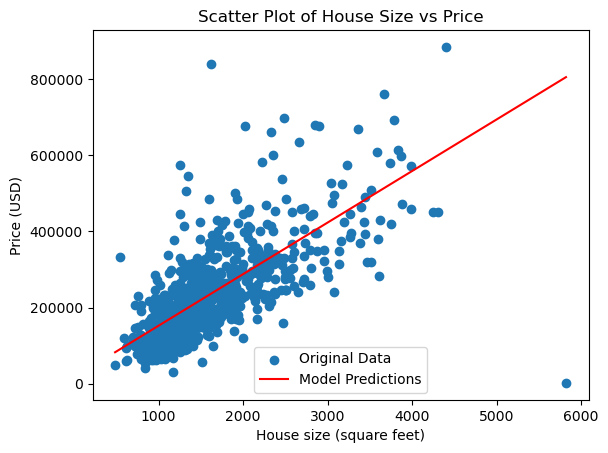

In [6]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

Don't worry about the details of this plot. This is simply depicting the predicted values of house price (red line) for the final linear regression model.



### Multivariable linear regression

Wouldn't it be nice if we could consider more than just one factor when making predictions? Multivariable linear regression lets us do just that by including multiple predictors. In the real world, outcomes like house prices depend on more than just one variable. For example, not only does the size of the house matter, but so do factors like the number of bedrooms, the location, and even the property’s condition.

With multivariable linear regression, we can take all of these into account, giving us a more accurate and realistic model. Here, we'll use the Sacramento real estate data to include both house size and number of bedrooms to predict sale prices. This opens the door to countless possibilities where we can model more complex relationships in various fields.

The equation for the multivariable regression is:

$$
\text{House sale price} = b_0 + b_1 \times (\text{house size}) + b_2 \times (\text{number of bedrooms})
$$

where:

- $b_0$ is the price when both house size and number of bedrooms are 0 (the intercept).
- $b_1$ is how much the price increases for each unit increase in house size (the slope for house size).
- $b_2$ is how much the price increases for each additional bedroom (the slope for number of bedrooms).

Using scikit-learn, we can easily include both predictors and fit the model as before.

#### **Step 1:** Fit the linear regression model on the training data.

In [7]:
# Multivariable Linear Regression (using both square footage and number of bedrooms as predictors)
mlm = LinearRegression()

mlm.fit(
    sacramento_train[["sq__ft", "beds"]],  # Two predictors: square footage and number of bedrooms
    sacramento_train["price"]  # Target variable: house prices
)

# Comparison: This is how simple linear regression would look, using only square footage
# lm.fit(
#    sacramento_train[["sq__ft"]],  # Single predictor: square footage
#    sacramento_train["price"]  # Target variable: house prices
# )

LinearRegression()

#### **Step 2:** Make predictions on the test data set to assess the quality of our model.

In [8]:
# Predict house prices using the multivariable linear regression model (mlm) with two predictors: square footage and number of bedrooms.
# This is different from earlier examples where only square footage was used as a predictor.
sacramento_test["predicted"] = mlm.predict(sacramento_test[["sq__ft", "beds"]])

# Calculate RMSPE for the multivariable model.
lm_mult_test_RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

lm_mult_test_RMSPE

91727.91046923249

Our model’s test error as assessed by RMSPE is $91,727. 

For each predictor in a multivariable linear regression model, we get a slope (coefficient) and an intercept, which together describe the best fit mathematically. In scikit-learn, we can extract these values from the model as follows:

Slopes (coefficients): These are obtained from the `coef_` property of the model.
Intercept: This is obtained from the `intercept_` property of the model.

In [9]:
mlm.coef_

array([   155.43727531, -21184.24787049])

In [10]:
mlm.intercept_

53995.22179883951

So since we used sacramento_train[["sq__ft", "beds"]] when training, we have that `mlm.coef_[0]` corresponds to square feet, and `mlm.coef_[1]` corresponds to beds. 

Given the model output values:

- Intercept ($b_0$): 53,995
- Slope for house size ($ b_1$): 155
- Slope for number of bedrooms ($b_2$): -21,184

The equation of the plane of best fit is:

$$
\text{House sale price} = 53,995 + 155 \times (\text{house size}) -21,184 \times (\text{number of bedrooms})
$$

This equation describes how the house sale price is predicted based on both house size and the number of bedrooms.

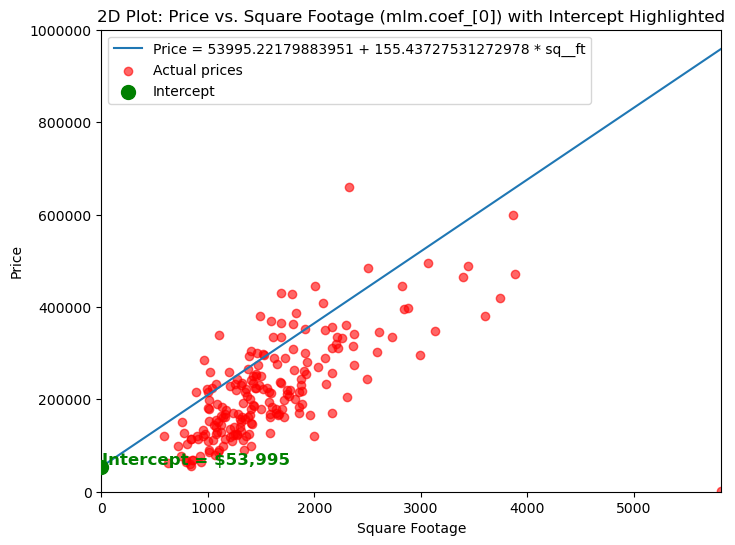

In [11]:
# 2D plot for sq__ft (coefficient mlm.coef_[0])
plt.figure(figsize=(8, 6))

# Extend the square footage range to include 0 for better intercept visibility
sqft_values_extended = np.linspace(0, sacramento_test["sq__ft"].max(), 100)

# Plotting the price prediction based on square footage (sq__ft)
plt.plot(sqft_values_extended, mlm.intercept_ + mlm.coef_[0] * sqft_values_extended, 
         label=f"Price = {mlm.intercept_} + {mlm.coef_[0]} * sq__ft")

# Scatter actual prices for comparison, with reduced opacity to improve intercept visibility
plt.scatter(sacramento_test["sq__ft"], sacramento_test["price"], color='red', label="Actual prices", alpha=0.6)

# Highlight the intercept as a larger marker on the y-axis
plt.scatter(0, mlm.intercept_, color='green', s=100, zorder=5, label="Intercept")  # A larger point at (0, intercept)

# Annotate the intercept with larger, clearer text and a better position
plt.text(10, mlm.intercept_ + 5000, f"Intercept = ${int(mlm.intercept_):,}", color='green', fontsize=12, fontweight='bold')

# Adjust x-axis to start at 0 to ensure the intercept is visible and crosses the y-axis
plt.xlim([0, sacramento_test["sq__ft"].max()])

# Adjust y-axis to reflect plain numbers, setting appropriate limits
plt.ylim([0, 1e6])
plt.ticklabel_format(style='plain')

plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("2D Plot: Price vs. Square Footage (mlm.coef_[0]) with Intercept Highlighted")
plt.legend()
plt.show()

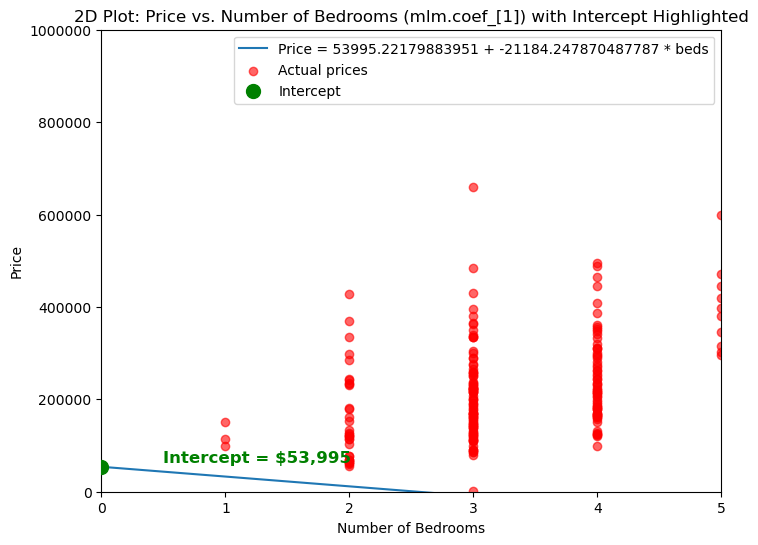

In [12]:
# 2D plot for beds (coefficient mlm.coef_[1])
plt.figure(figsize=(8, 6))

# Generate values for number of bedrooms (beds) within the range of the dataset
beds_values = np.linspace(0, sacramento_test["beds"].max(), 100)

# Plotting the price prediction based on number of bedrooms (beds)
plt.plot(beds_values, mlm.intercept_ + mlm.coef_[1] * beds_values, 
         label=f"Price = {mlm.intercept_} + {mlm.coef_[1]} * beds")

# Scatter actual prices for comparison, with reduced opacity to improve intercept visibility
plt.scatter(sacramento_test["beds"], sacramento_test["price"], color='red', label="Actual prices", alpha=0.6)

# Highlight the intercept as a larger marker on the y-axis
plt.scatter(0, mlm.intercept_, color='green', s=100, zorder=5, label="Intercept")  # A larger point at (0, intercept)

# Annotate the intercept with larger, clearer text and a better position
plt.text(0.5, mlm.intercept_ + 10000, f"Intercept = ${int(mlm.intercept_):,}", color='green', fontsize=12, fontweight='bold')

# Adjust x-axis to start at 0 to ensure the intercept is visible and crosses the y-axis
plt.xlim([0, sacramento_test["beds"].max()])

# Adjust y-axis to reflect plain numbers, setting appropriate limits
plt.ylim([0, 1e6])
plt.ticklabel_format(style='plain')

plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("2D Plot: Price vs. Number of Bedrooms (mlm.coef_[1]) with Intercept Highlighted")
plt.legend()
plt.show()

> #### **Wait, why does that graph look so bad? Why is it that the linear regression line doesn’t go through the data points?** 
>
> Well, that’s because in multivariable linear regression, each predictor affects the target variable (price) in combination with other predictors. In this case, the model considers both square footage (`sq__ft`) and the number of bedrooms (`beds`). When we isolate just the number of bedrooms, we’re ignoring the important contribution from square footage, which is why the line doesn’t fit the data well. The reason we drew this graph is for you to visualize how the number of bedrooms relates to price, but in multivariable regression, the relationships between variables are interconnected, so we need to consider both factors together for the best understanding.

In [16]:
import plotly.graph_objects as go
import numpy as np

# Generate a mesh grid for both sq__ft and beds
sqft_values = np.linspace(sacramento_test["sq__ft"].min(), sacramento_test["sq__ft"].max(), 100)
beds_values = np.linspace(sacramento_test["beds"].min(), sacramento_test["beds"].max(), 100)
sqft_grid, beds_grid = np.meshgrid(sqft_values, beds_values)

# Use the multivariable linear regression model to calculate prices for the grid
price_plane = mlm.intercept_ + mlm.coef_[0] * sqft_grid + mlm.coef_[1] * beds_grid

# Create the 3D surface plot with plotly
fig = go.Figure(data=[go.Surface(z=price_plane, x=sqft_grid, y=beds_grid, colorscale='Viridis', opacity=0.7)])

# Scatter actual prices as points
fig.add_trace(go.Scatter3d(x=sacramento_test["sq__ft"], 
                           y=sacramento_test["beds"], 
                           z=sacramento_test["price"], 
                           mode='markers', marker=dict(size=5, color='red'), name='Actual Prices'))

# Set axis titles and flip both the x-axis and y-axis by adjusting their ranges
fig.update_layout(scene=dict(
                    xaxis=dict(title='Square Footage', range=[sqft_values.max(), sqft_values.min()]),  # Flip x-axis (high to low)
                    yaxis=dict(title='Number of Bedrooms', range=[beds_values.min(), beds_values.max()]),  # Flip y-axis to go low to high
                    zaxis=dict(title='Price', range=[price_plane.min(), price_plane.max()])  # Keep z-axis normal
                  ),
                  title="3D Plot: Price vs. Square Footage and Bedrooms (Correct Axes Orientation)",
                  width=1200,  # Set the width to make the plot bigger
                  height=800)  # Set the height to make the plot bigger

# Show the plot
fig.show()



> Feel free to **drag, rotate, and explore** the 3D graph above, as it offers full interactivity. You can move around the graph to better understand the relationships between square footage, number of bedrooms, and price.  
> 
> **Disclaimer**: This 3D interactive feature will only work if you run the notebook locally on your computer. It won't display interactively on GitHub.



### Conclusion

In this notebook, we worked through several steps to predict housing prices using square feet using a data set of 932 real estate transactions in Sacramento, California. Here's a summary of what we covered:

1. **Simple Linear Regression:** We implemented simple linear regression and evaluated its performance on a test dataset.

2. **Multiple Linear Regression:** We implemented multiple linear regression and evaluated its performance on a test dataset.


We hope this notebook has provided a practical understanding of data regression, model evaluation, and the application of machine learning algorithms like linear regression. Feel free to experiment further with the dataset or the code to enhance your learning!